## Home Credit Default Risk
Can you predict how capable each applicant is of repaying a loan?

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')

from fastai.structured import *
from fastai.column_data import *
np.set_printoptions(threshold=50, edgeitems=20)
from IPython.display import HTML, display

PATH = "../../../data/home-credit-default-risk/"

/home/max/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/max/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/max/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
ls {PATH}

application_test.csv     HomeCredit_columns_description.csv
application_train.csv    installments_payments.csv
bureau_balance.csv       POS_CASH_balance.csv
bureau.csv               previous_application.csv
credit_card_balance.csv  sample_submission.csv


In [5]:
#columns_description = pd.read_csv(f'{PATH}HomeCredit_columns_description.csv')
!unzip -ux '{PATH}application_test.csv.zip' -d '{PATH}'
!unzip -ux '{PATH}application_train.csv.zip' -d '{PATH}'
!unzip -ux '{PATH}bureau_balance.csv.zip' -d '{PATH}'
!unzip -ux '{PATH}bureau.csv.zip' -d '{PATH}'
!unzip -ux '{PATH}credit_card_balance.csv.zip' -d '{PATH}'
!unzip -ux '{PATH}installments_payments.csv.zip' -d '{PATH}'
!unzip -ux '{PATH}POS_CASH_balance.csv.zip' -d '{PATH}'
!unzip -ux '{PATH}previous_application.csv.zip' -d '{PATH}'
#!unzip -ux '{PATH}sample_submission.csv.zip' -d '{PATH}'


unzip:  cannot find or open ../../../data/home-credit-default-risk/application_test.csv.zip, ../../../data/home-credit-default-risk/application_test.csv.zip.zip or ../../../data/home-credit-default-risk/application_test.csv.zip.ZIP.
unzip:  cannot find or open ../../../data/home-credit-default-risk/application_train.csv.zip, ../../../data/home-credit-default-risk/application_train.csv.zip.zip or ../../../data/home-credit-default-risk/application_train.csv.zip.ZIP.
unzip:  cannot find or open ../../../data/home-credit-default-risk/bureau_balance.csv.zip, ../../../data/home-credit-default-risk/bureau_balance.csv.zip.zip or ../../../data/home-credit-default-risk/bureau_balance.csv.zip.ZIP.
unzip:  cannot find or open ../../../data/home-credit-default-risk/bureau.csv.zip, ../../../data/home-credit-default-risk/bureau.csv.zip.zip or ../../../data/home-credit-default-risk/bureau.csv.zip.ZIP.
unzip:  cannot find or open ../../../data/home-credit-default-risk/credit_card_balance.csv.zip, ../..

1. The 'bureau_balance' has been excluded

In [3]:
 file_names = ['bureau_balance', 'bureau']

# file_names = ['application_train', 'application_test', 'bureau', 'credit_card_balance', 
#          'installments_payments', 'POS_CASH_balance', 'previous_application']

tables = [pd.read_csv(f'{PATH}{file_name}.csv',low_memory=False) for file_name in file_names]


In [26]:
for t in tables: display(t.head())

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
for t in tables: display(DataFrameSummary(t).summary())

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511,307511,NaN,NaN,NaN,NaN,307511,307511,307511,307499,...,307511,307511,307511,307511,265992,265992,265992,265992,265992,265992
mean,278181,0.0807288,NaN,NaN,NaN,NaN,0.417052,168798,599026,27108.6,...,0.00812979,0.000595101,0.000507299,0.000334947,0.00640245,0.00700021,0.0343619,0.267395,0.265474,1.89997
std,102790,0.272419,NaN,NaN,NaN,NaN,0.722121,237123,402491,14493.7,...,0.0897982,0.0243875,0.0225176,0.0182985,0.0838491,0.110757,0.204685,0.916002,0.794056,1.86929
min,100002,0,NaN,NaN,NaN,NaN,0,25650,45000,1615.5,...,0,0,0,0,0,0,0,0,0,0
25%,189146,0,NaN,NaN,NaN,NaN,0,112500,270000,16524,...,0,0,0,0,0,0,0,0,0,0
50%,278202,0,NaN,NaN,NaN,NaN,0,147150,513531,24903,...,0,0,0,0,0,0,0,0,0,1
75%,367142,0,NaN,NaN,NaN,NaN,1,202500,808650,34596,...,0,0,0,0,0,0,0,0,0,3
max,456255,1,NaN,NaN,NaN,NaN,19,1.17e+08,4.05e+06,258026,...,1,1,1,1,4,9,8,27,261,25
counts,307511,307511,307511,307511,307511,307511,307511,307511,307511,307499,...,307511,307511,307511,307511,265992,265992,265992,265992,265992,265992
uniques,307511,2,2,3,2,2,15,2548,5603,13672,...,2,2,2,2,5,9,9,24,11,25


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744,NaN,NaN,NaN,NaN,48744,48744,48744,48720,48744,...,48744,48744,48744,48744,42695,42695,42695,42695,42695,42695
mean,277797,NaN,NaN,NaN,NaN,0.397054,178432,516740,29426.2,462619,...,0.00155917,0,0,0,0.00210798,0.00180349,0.00278721,0.00929851,0.546902,1.98377
std,103170,NaN,NaN,NaN,NaN,0.709047,101523,365397,16016.4,336710,...,0.0394559,0,0,0,0.0463727,0.0461324,0.0540374,0.110924,0.693305,1.83887
min,100001,NaN,NaN,NaN,NaN,0,26941.5,45000,2295,45000,...,0,0,0,0,0,0,0,0,0,0
25%,188558,NaN,NaN,NaN,NaN,0,112500,260640,17973,225000,...,0,0,0,0,0,0,0,0,0,0
50%,277549,NaN,NaN,NaN,NaN,0,157500,450000,26199,396000,...,0,0,0,0,0,0,0,0,0,2
75%,367556,NaN,NaN,NaN,NaN,1,225000,675000,37390.5,630000,...,0,0,0,0,0,0,0,0,1,3
max,456250,NaN,NaN,NaN,NaN,20,4.41e+06,2.2455e+06,180576,2.2455e+06,...,1,0,0,0,2,2,2,6,7,17
counts,48744,48744,48744,48744,48744,48744,48744,48744,48720,48744,...,48744,48744,48744,48744,42695,42695,42695,42695,42695,42695
uniques,48744,2,2,2,2,11,606,2937,7491,677,...,2,1,1,1,3,3,3,7,8,16


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
count,2.72999e+07,2.72999e+07,NaN
mean,6.0363e+06,-30.7417,NaN
std,492349,23.8645,NaN
min,5.00171e+06,-96,NaN
25%,5.73093e+06,-46,NaN
50%,6.07082e+06,-25,NaN
75%,6.43195e+06,-11,NaN
max,6.84289e+06,0,NaN
counts,27299925,27299925,27299925
uniques,817395,97,8


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,1.71643e+06,1.71643e+06,NaN,NaN,1.71643e+06,1.71643e+06,1.61088e+06,1.08278e+06,591940,1.71643e+06,1.71642e+06,1.45876e+06,1.12465e+06,1.71643e+06,NaN,1.71643e+06,489637
mean,278215,5.92443e+06,NaN,NaN,-1142.11,0.818167,510.517,-1017.44,3825.42,0.00641041,354995,137085,6229.51,37.9128,NaN,-593.748,15712.8
std,102939,532266,NaN,NaN,795.165,36.5444,4994.22,714.011,206032,0.0962239,1.14981e+06,677401,45032,5937.65,NaN,720.747,325827
min,100001,5e+06,NaN,NaN,-2922,0,-42060,-42023,0,0,0,-4.7056e+06,-586406,0,NaN,-41947,0
25%,188867,5.46395e+06,NaN,NaN,-1666,0,-1138,-1489,0,0,51300,0,0,0,NaN,-908,0
50%,278055,5.9263e+06,NaN,NaN,-987,0,-330,-897,0,0,125518,0,0,0,NaN,-395,0
75%,367426,6.38568e+06,NaN,NaN,-474,0,474,-425,0,0,315000,40153.5,0,0,NaN,-33,13500
max,456255,6.84346e+06,NaN,NaN,0,2792,31199,0,1.15987e+08,9,5.85e+08,1.701e+08,4.7056e+06,3.75668e+06,NaN,372,1.18453e+08
counts,1716428,1716428,1716428,1716428,1716428,1716428,1610875,1082775,591940,1716428,1716415,1458759,1124648,1716428,1716428,1716428,489637
uniques,305811,1716428,4,4,2923,942,14096,2917,68251,10,236708,226537,51726,1616,15,2982,40321


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
count,3.84031e+06,3.84031e+06,3.84031e+06,3.84031e+06,3.84031e+06,3.0905e+06,3.84031e+06,3.0905e+06,3.0905e+06,3.53508e+06,...,3.84031e+06,3.84031e+06,3.0905e+06,3.84031e+06,3.0905e+06,3.0905e+06,3.53508e+06,NaN,3.84031e+06,3.84031e+06
mean,1.9045e+06,278324,-34.5219,58300.2,153808,5961.32,7433.39,288.17,2968.8,3540.2,...,58088.8,58098.3,0.309449,0.703144,0.0048125,0.559479,20.8251,NaN,9.28367,0.331622
std,536469,102704,26.6678,106307,165146,28225.7,33846.1,8201.99,20796.9,5600.15,...,105965,105972,1.1004,3.19035,0.0826386,3.24065,20.0515,NaN,97.5157,21.4792
min,1.00002e+06,100006,-96,-420250,0,-6827.31,-6211.62,0,0,0,...,-420250,-420250,0,0,0,0,0,NaN,0,0
25%,1.43438e+06,189517,-55,0,45000,0,0,0,0,0,...,0,0,0,0,0,0,4,NaN,0,0
50%,1.89712e+06,278396,-28,0,112500,0,0,0,0,0,...,0,0,0,0,0,0,15,NaN,0,0
75%,2.36933e+06,367580,-11,89046.7,180000,0,0,0,0,6633.91,...,88899.5,88914.5,0,0,0,0,32,NaN,0,0
max,2.8435e+06,456250,-1,1.5059e+06,1.35e+06,2.115e+06,2.2871e+06,1.52985e+06,2.23927e+06,202882,...,1.49334e+06,1.49334e+06,51,165,12,165,120,NaN,3260,3260
counts,3840312,3840312,3840312,3840312,3840312,3090496,3840312,3090496,3090496,3535076,...,3840312,3840312,3090496,3840312,3090496,3090496,3535076,3840312,3840312,3840312
uniques,104307,103558,96,1347904,181,2267,187005,1832,168748,312266,...,1338878,1339008,44,129,11,133,121,7,917,378


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,1.36054e+07,1.36054e+07,1.36054e+07,1.36054e+07,1.36054e+07,1.36025e+07,1.36054e+07,1.36025e+07
mean,1.90336e+06,278445,0.856637,18.8709,-1042.27,-1051.11,17050.9,17238.2
std,536203,102718,1.03522,26.6641,800.946,800.586,50570.3,54735.8
min,1e+06,100001,0,1,-2922,-4921,0,0
25%,1.43419e+06,189639,0,4,-1654,-1662,4226.09,3398.26
50%,1.89652e+06,278685,1,8,-818,-827,8884.08,8125.52
75%,2.36909e+06,367530,1,19,-361,-370,16710.2,16108.4
max,2.8435e+06,456255,178,277,-1,-1,3.77149e+06,3.77149e+06
counts,13605401,13605401,13605401,13605401,13605401,13602496,13605401,13602496
uniques,997752,339587,65,277,2922,3039,902539,944235


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
count,1.00014e+07,1.00014e+07,1.00014e+07,9.97529e+06,9.97527e+06,NaN,1.00014e+07,1.00014e+07
mean,1.90322e+06,278404,-35.0126,17.0897,10.4838,NaN,11.6069,0.654468
std,535847,102764,26.0666,11.9951,11.1091,NaN,132.714,32.7625
min,1e+06,100001,-96,1,0,NaN,0,0
25%,1.43440e+06,189550,-54,10,3,NaN,0,0
50%,1.89656e+06,278654,-28,12,7,NaN,0,0
75%,2.36896e+06,367429,-13,24,14,NaN,0,0
max,2.8435e+06,456255,-1,92,85,NaN,4231,3595
counts,10001358,10001358,10001358,9975287,9975271,10001358,10001358,10001358
uniques,936325,337252,96,73,79,9,3400,2307


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.67021e+06,1.67021e+06,NaN,1.29798e+06,1.67021e+06,1.67021e+06,774370,1.2847e+06,NaN,1.67021e+06,...,NaN,1.29798e+06,NaN,NaN,997149,997149,997149,997149,997149,997149
mean,1.92309e+06,278357,NaN,15955.1,175234,196114,6697.4,227847,NaN,12.4842,...,NaN,16.0541,NaN,NaN,342210,13826.3,33767.8,76582.4,81992.3,0.33257
std,532598,102815,NaN,14782.1,292780,318575,20921.5,315397,NaN,3.33403,...,NaN,14.5673,NaN,NaN,88916.1,72444.9,106857,149647,153304,0.471134
min,1e+06,100001,NaN,0,0,0,-0.9,0,NaN,0,...,NaN,0,NaN,NaN,-2922,-2892,-2801,-2889,-2874,0
25%,1.46186e+06,189329,NaN,6321.78,18720,24160.5,0,50841,NaN,10,...,NaN,6,NaN,NaN,365243,-1628,-1242,-1314,-1270,0
50%,1.92311e+06,278714,NaN,11250,71046,80541,1638,112320,NaN,12,...,NaN,12,NaN,NaN,365243,-831,-361,-537,-499,0
75%,2.38428e+06,367514,NaN,20658.4,180360,216418,7740,234000,NaN,15,...,NaN,24,NaN,NaN,365243,-411,129,-74,-44,1
max,2.84538e+06,456255,NaN,418058,6.90516e+06,6.90516e+06,3.06004e+06,6.90516e+06,NaN,23,...,NaN,84,NaN,NaN,365243,365243,365243,365243,365243,1
counts,1670214,1670214,1670214,1297979,1670214,1670213,774370,1284699,1670214,1670214,...,1670214,1297984,1670214,1669868,997149,997149,997149,997149,997149,997149
uniques,1670214,338857,4,357959,93885,86803,29278,93885,7,24,...,11,49,5,17,2838,2892,4605,2873,2830,2


In [45]:
bb = tables[0]
b = tables[1]

In [5]:
display(bb.head())

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [6]:
display(b.head())

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


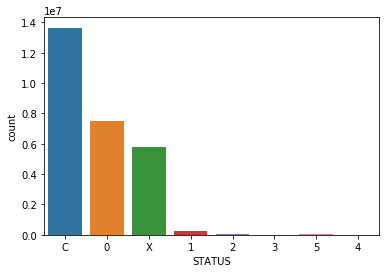

In [7]:
sns.countplot(bb.STATUS)

In [91]:
? bb.groupby

In [128]:
bb_agr = {'MONTHS_BALANCE': ['min', 'max', 'mean', 'size']}
bb_agg = bb.groupby('SK_ID_BUREAU', as_index=False).agg(bb_agr)

In [129]:
bb_agg = bb_agg.reset_index()


In [130]:
bb_agg.index

RangeIndex(start=0, stop=817395, step=1)

In [134]:
bb_agg.columns

MultiIndex(levels=[['MONTHS_BALANCE', 'SK_ID_BUREAU', 'index'], ['min', 'max', 'mean', 'size', '']],
           labels=[[2, 1, 0, 0, 0, 0], [4, 4, 0, 1, 2, 3]])

In [131]:
b.columns

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object')

In [133]:
b.join(bb_agg, 'SK_ID_BUREAU', how='left')

/home/max/anaconda3/envs/fastai/lib/python3.6/site-packages/pandas/core/reshape/merge.py:544: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,...,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,"(index, )","(SK_ID_BUREAU, )","(MONTHS_BALANCE, min)","(MONTHS_BALANCE, max)","(MONTHS_BALANCE, mean)","(MONTHS_BALANCE, size)"
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,...,0.0,Consumer credit,-131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,...,0.0,Credit card,-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,...,0.0,Consumer credit,-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,...,0.0,Credit card,-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.500,0,...,0.0,Consumer credit,-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,215354,5714467,Active,currency 1,-273,0,27460.0,NaN,0.000,0,...,0.0,Credit card,-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,215354,5714468,Active,currency 1,-43,0,79.0,NaN,0.000,0,...,0.0,Consumer credit,-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,162297,5714469,Closed,currency 1,-1896,0,-1684.0,-1710.0,14985.000,0,...,0.0,Consumer credit,-1710,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,162297,5714470,Closed,currency 1,-1146,0,-811.0,-840.0,0.000,0,...,0.0,Consumer credit,-840,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,162297,5714471,Active,currency 1,-1146,0,-484.0,NaN,0.000,0,...,0.0,Credit card,-690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
